# SUPPORT VECTOR MACHINE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the Dataset

data = pd.read_csv('Pharma_Industry.csv')
data.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [3]:
# checking null values
data.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [5]:
# renaming the Dataset | for my understanding

data.rename(columns={'Drug Dosage (mg)':'Drug_Dosage',
            'Systolic Blood Pressure (mmHg)':'Systolic_Blood_Pressure',
            'Heart Rate (BPM)':'Heart_Rate',
            'Liver Toxicity Index (U/L)':'Liver_Toxicity',
            'Blood Glucose Level (mg/dL)':'Blood_Glucose_Lvl',
            'Drug Response':'Drug_Response'}, inplace=True)
data.head()

,Drug_Dosage,Systolic_Blood_Pressure,Heart_Rate,Liver_Toxicity,Blood_Glucose_Lvl,Drug_Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Drug_Dosage              500 non-null    float64
 1   Systolic_Blood_Pressure  500 non-null    float64
 2   Heart_Rate               500 non-null    float64
 3   Liver_Toxicity           500 non-null    float64
 4   Blood_Glucose_Lvl        500 non-null    float64
 5   Drug_Response            500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [7]:
data.describe()

,Drug_Dosage,Systolic_Blood_Pressure,Heart_Rate,Liver_Toxicity,Blood_Glucose_Lvl,Drug_Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [8]:
# chekcing duplicates
data[data.duplicated()]

,Drug_Dosage,Systolic_Blood_Pressure,Heart_Rate,Liver_Toxicity,Blood_Glucose_Lvl,Drug_Response


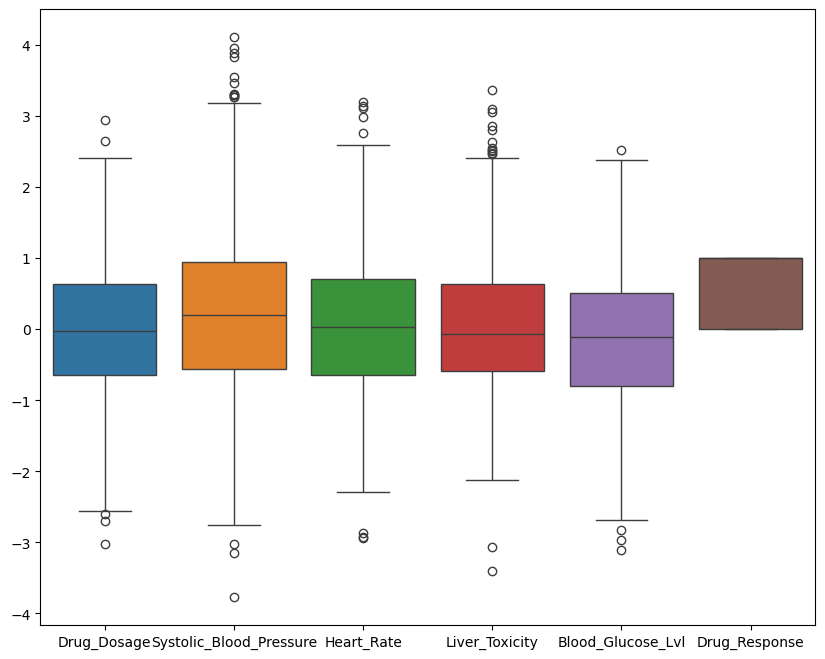

In [9]:
# checking Outliers
plt.figure(figsize=(10,8))
sns.boxplot(data)
plt.show()

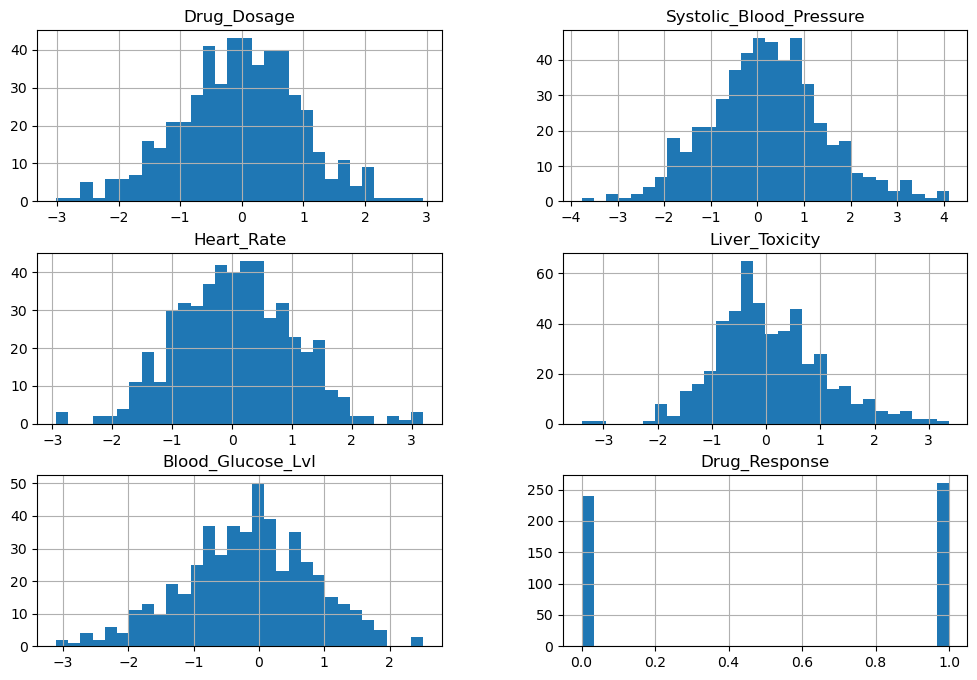

In [10]:
# Distribution of Data

data.hist(bins=30, figsize=(12,8))
plt.show()

In [11]:
# correlation of data
data.corr()

,Drug_Dosage,Systolic_Blood_Pressure,Heart_Rate,Liver_Toxicity,Blood_Glucose_Lvl,Drug_Response
Drug_Dosage,1.000000,0.090618,0.040571,0.128127,0.012434,0.043457
Systolic_Blood_Pressure,0.090618,1.000000,-0.039195,0.283672,0.037228,0.305226
Heart_Rate,0.040571,-0.039195,1.000000,0.005818,0.049897,-0.009715
Liver_Toxicity,0.128127,0.283672,0.005818,1.000000,0.229474,0.434722
Blood_Glucose_Lvl,0.012434,0.037228,0.049897,0.229474,1.000000,0.169342
Drug_Response,0.043457,0.305226,-0.009715,0.434722,0.169342,1.000000


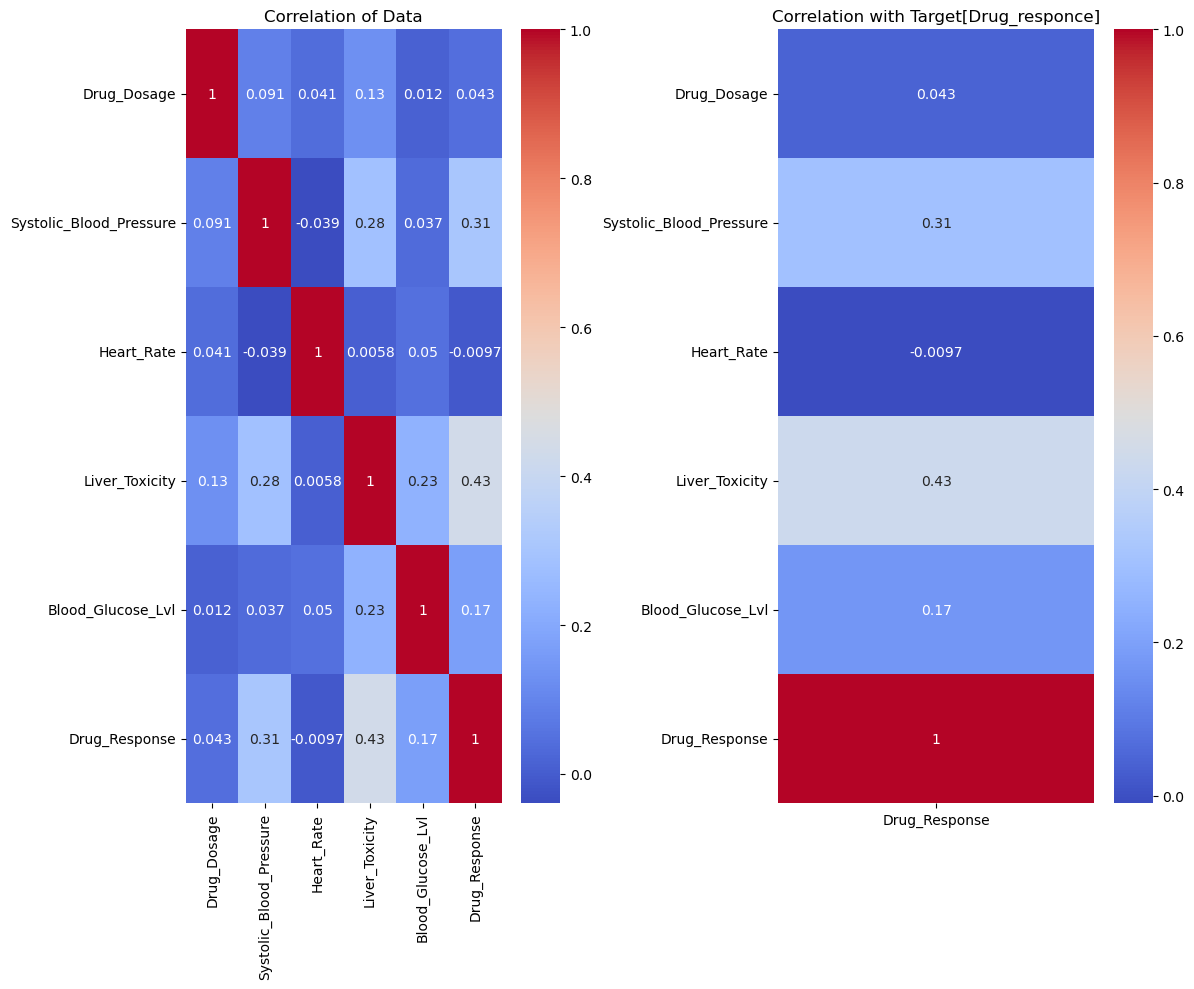

In [12]:
# correlation of data
plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
plt.title("Correlation of Data")
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

plt.subplot(1,2,2)
plt.title("Correlation with Target[Drug_responce]")
sns.heatmap(data.corr()[['Drug_Response']], annot=True, cmap='coolwarm')


plt.tight_layout()
plt.show()

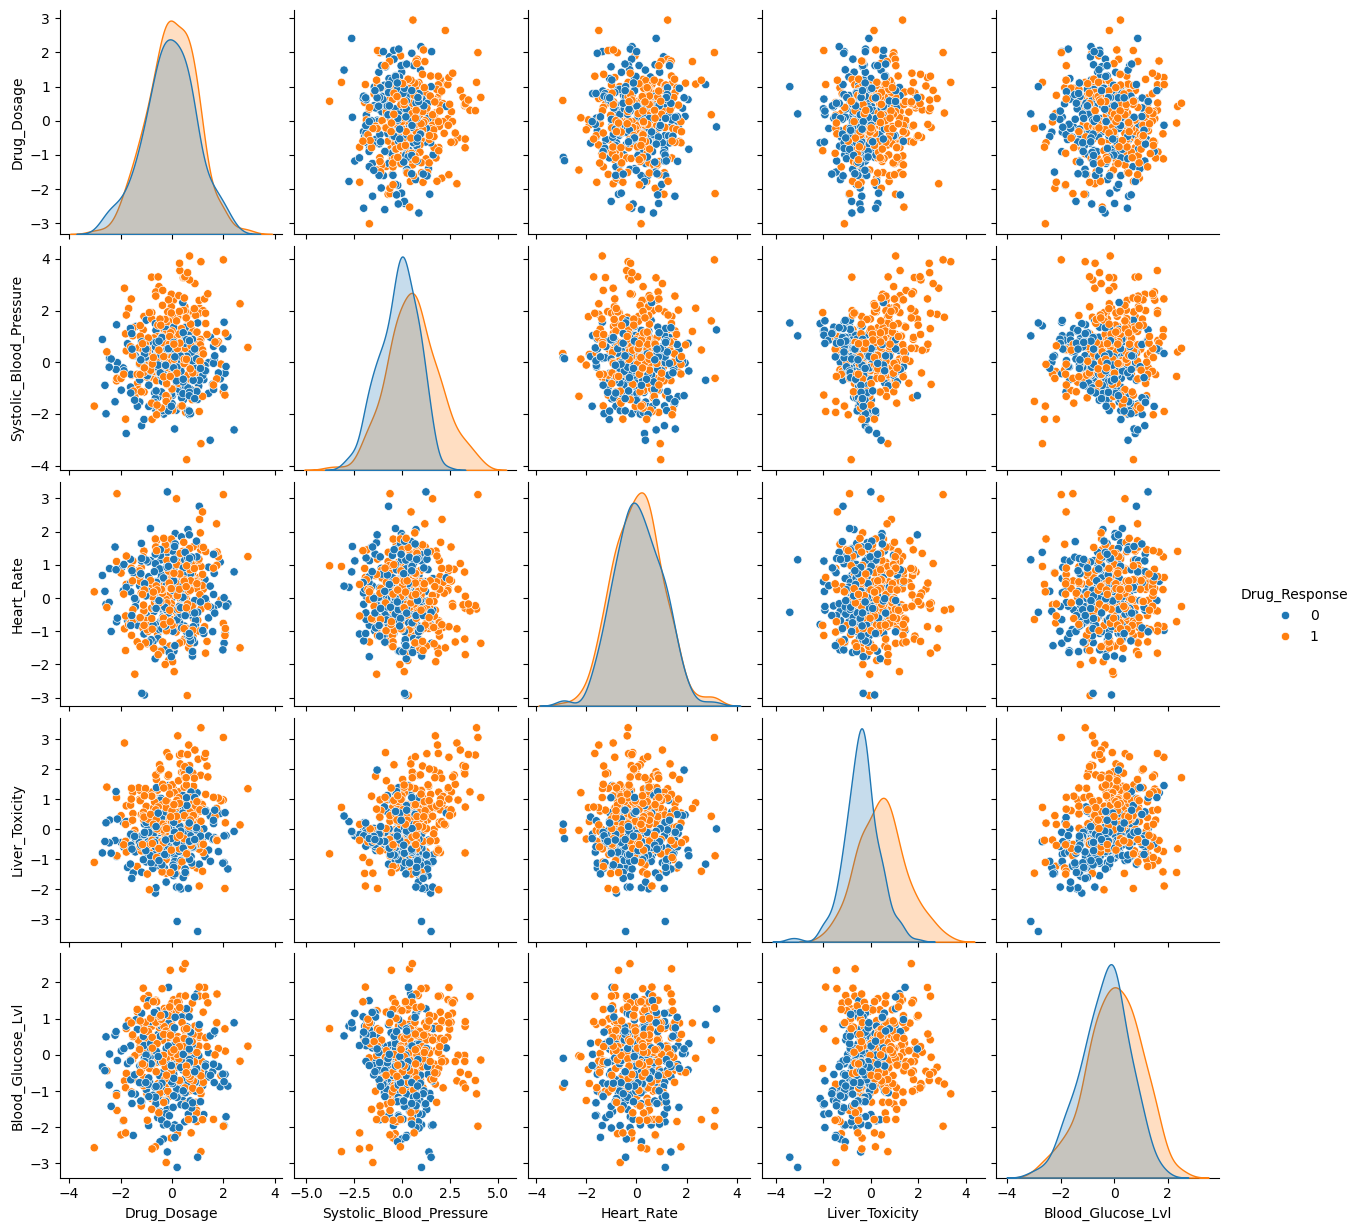

In [13]:
sns.pairplot(data, hue='Drug_Response')
plt.show()

##### No Need to do scaling, becz above data Already scaled

#### Separate features and Evaluating SVM

In [14]:
# Separate feature (X) and Target (y)

X = data.drop(columns=['Drug_Response'])
y = data['Drug_Response']

In [15]:
X.head()

,Drug_Dosage,Systolic_Blood_Pressure,Heart_Rate,Liver_Toxicity,Blood_Glucose_Lvl
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355
4,0.377100,0.538410,-0.029263,1.896015,-0.960130


In [16]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Drug_Response, dtype: int64

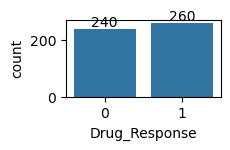

Drug_Response
1    260
0    240
Name: count, dtype: int64
Drug_Response
1    0.52
0    0.48
Name: proportion, dtype: float64


In [17]:
# checking Target[y] data set is balanced or not

plt.figure(figsize=(2,1))
ax = sns.countplot(x='Drug_Response', data=data)
ax.bar_label(ax.containers[0])
plt.show()
print(y.value_counts())
print(y.value_counts(normalize=True))

In [18]:
# Train and Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 5), (100, 5), (400,), (100,))

#### Applying SVM Model

#### Radial Basis Classifier (RBF Model)

- Handles complex non-linear data
- Most flexible kernel
- Performs well after scaling and tuning
  

In [19]:
from sklearn.svm import SVC

svm_rbf = SVC(C=1, kernel='rbf', gamma=0.1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

#### Evaluate on training data

In [20]:
y_pred_train = svm_rbf.predict(X_train)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [22]:
def evalute_SVM(y, y_pred):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    accu = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    
    print('Accuracy for testing :',np.round(accu,3))
    print('Precision for testing :',np.round(prec,3))
    print('Recall for testing :',np.round(recall,3))
    print('F1 for testing :',np.round(f1,3))

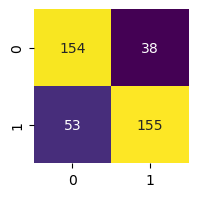

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       192
           1       0.80      0.75      0.77       208

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400

Accuracy for testing : 0.772
Precision for testing : 0.803
Recall for testing : 0.745
F1 for testing : 0.773


In [23]:
plt.figure(figsize=(2,2))
CM_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(CM_train, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.show()
print(classification_report(y_train, y_pred_train))
evalute_SVM(y_train, y_pred_train)

#### Evaluate on testing data

In [24]:
y_pred_test = svm_rbf.predict(X_test)

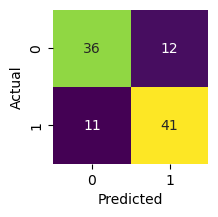

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        48
           1       0.77      0.79      0.78        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100

Accuracy for testing : 0.77
Precision for testing : 0.774
Recall for testing : 0.788
F1 for testing : 0.781


In [25]:
plt.figure(figsize=(2,2))
CM_train = confusion_matrix(y_test, y_pred_test)
sns.heatmap(CM_train, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred_test))
evalute_SVM(y_test, y_pred_test)

#### Polynomial Classifier (poly Model)

- Handles some non-linearity
- Performance depends on degree
- Higher degree increases overfitting

In [26]:
from sklearn.svm import SVC

svm_poly = SVC(C=1, kernel='poly', degree=2)
svm_poly.fit(X_train, y_train)

SVC(C=1, degree=2, kernel='poly')

#### Evaluate on training data

In [27]:
y_pred_train = svm_poly.predict(X_train)

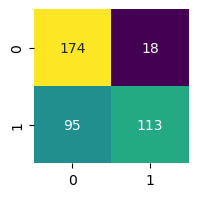

              precision    recall  f1-score   support

           0       0.65      0.91      0.75       192
           1       0.86      0.54      0.67       208

    accuracy                           0.72       400
   macro avg       0.75      0.72      0.71       400
weighted avg       0.76      0.72      0.71       400

Accuracy for testing : 0.718
Precision for testing : 0.863
Recall for testing : 0.543
F1 for testing : 0.667


In [28]:
plt.figure(figsize=(2,2))
CM_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(CM_train, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.show()
print(classification_report(y_train, y_pred_train))
evalute_SVM(y_train, y_pred_train)

#### Evaluate on testing data

In [29]:
y_pred_test = svm_poly.predict(X_test)

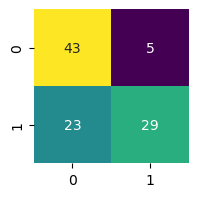

              precision    recall  f1-score   support

           0       0.65      0.90      0.75        48
           1       0.85      0.56      0.67        52

    accuracy                           0.72       100
   macro avg       0.75      0.73      0.71       100
weighted avg       0.76      0.72      0.71       100

Accuracy for testing : 0.72
Precision for testing : 0.853
Recall for testing : 0.558
F1 for testing : 0.674


In [30]:
plt.figure(figsize=(2,2))
CM_train = confusion_matrix(y_test, y_pred_test)
sns.heatmap(CM_train, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.show()
print(classification_report(y_test, y_pred_test))
evalute_SVM(y_test, y_pred_test)

#### Linear Classifier (linear Model)

- Works when data is almost linear
- Fast and simple
- Could not capture complex patterns in the dataset
  

In [31]:
from sklearn.svm import SVC

svm_linear = SVC(C=1, kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=1, kernel='linear')

#### Evaluate on training data

In [32]:
y_pred_train = svm_linear.predict(X_train)

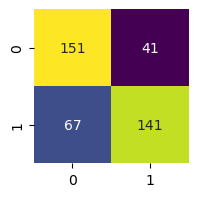

              precision    recall  f1-score   support

           0       0.69      0.79      0.74       192
           1       0.77      0.68      0.72       208

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.73      0.73       400

Accuracy for testing : 0.73
Precision for testing : 0.775
Recall for testing : 0.678
F1 for testing : 0.723


In [33]:
plt.figure(figsize=(2,2))
CM_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(CM_train, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.show()
print(classification_report(y_train, y_pred_train))
evalute_SVM(y_train, y_pred_train)

#### Evaluate on testing data

In [34]:
y_pred_test = svm_linear.predict(X_test)

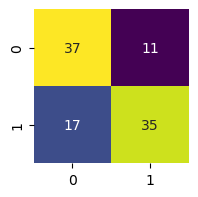

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        48
           1       0.76      0.67      0.71        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100

Accuracy for testing : 0.72
Precision for testing : 0.761
Recall for testing : 0.673
F1 for testing : 0.714


In [35]:
plt.figure(figsize=(2,2))
CM_train = confusion_matrix(y_test, y_pred_test)
sns.heatmap(CM_train, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.show()
print(classification_report(y_test, y_pred_test))
evalute_SVM(y_test, y_pred_test)

## Comparing Results for wich one is best

In [36]:
print("Linear Accuracy:", svm_linear.score(X_test, y_test))
print("Polynomial Accuracy:", svm_poly.score(X_test, y_test))
print("RBF Accuracy:", svm_rbf.score(X_test, y_test))

Linear Accuracy: 0.72
Polynomial Accuracy: 0.72
RBF Accuracy: 0.77


- High train, low test --> Overfitting
- Low train, low test	--> Underfitting
- Similar train & test --> Weak
- Test ≥ Train --> Well-regularized
- As per my Result Model is good

- as per Resulst RBF model is good, becz accuracy score is better

## Hyper parameter Tuning for All Models

In [37]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [38]:
pipeline = Pipeline([('svm', SVC(probability=True, random_state=42))])

In [39]:
param_grid = [
    # Linear kernel
    {
        "svm__kernel": ["linear"],
        "svm__C": [0.01, 0.1, 1, 10]
    },
    # RBF kernel
    {
        "svm__kernel": ["rbf"],
        "svm__C": [0.01, 0.1, 1, 10],
        "svm__gamma": [0.01, 0.1, 1, 10]
    },
    # Polynomial kernel
    {
        "svm__kernel": ["poly"],
        "svm__C": [0.01, 0.1, 1, 10],
        "svm__gamma": [0.01, 0.1, 1],
        "svm__degree": [2, 3]
    }
]

In [40]:
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring=scoring,
    refit="accuracy",   # model refits using accuracy
    n_jobs=-1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('svm',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid=[{'svm__C': [0.01, 0.1, 1, 10],
                          'svm__kernel': ['linear']},
                         {'svm__C': [0.01, 0.1, 1, 10],
                          'svm__gamma': [0.01, 0.1, 1, 10],
                          'svm__kernel': ['rbf']},
                         {'svm__C': [0.01, 0.1, 1, 10], 'svm__degree': [2, 3],
                          'svm__gamma': [0.01, 0.1, 1],
                          'svm__kernel': ['poly']}],
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [41]:
print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Best parameters: {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Best accuracy: 0.7525000000000001


In [42]:
cv_results = pd.DataFrame(grid.cv_results_)

# cv_results[['params','mean_test_accuracy','mean_test_precision','mean_test_recall','mean_test_f1',
#    'std_test_accuracy']]


In [43]:
best_model = grid.best_estimator_
print(best_model)


Pipeline(steps=[('svm',
                 SVC(C=1, gamma=0.1, probability=True, random_state=42))])


#### Evaluate on training data

In [44]:
y_pred_train_hyp = best_model.predict(X_train)

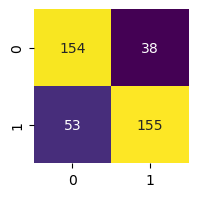

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       192
           1       0.80      0.75      0.77       208

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400

Accuracy for testing : 0.772
Precision for testing : 0.803
Recall for testing : 0.745
F1 for testing : 0.773


In [45]:
plt.figure(figsize=(2,2))
CM_train = confusion_matrix(y_train, y_pred_train_hyp)
sns.heatmap(CM_train, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.show()
print(classification_report(y_train, y_pred_train_hyp))
evalute_SVM(y_train, y_pred_train_hyp)

#### Evaluate on testing data

In [46]:
y_pred_test_hyp = best_model.predict(X_test)

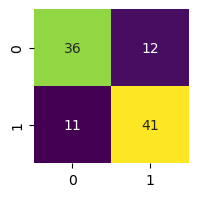

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        48
           1       0.77      0.79      0.78        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100

Accuracy for testing : 0.77
Precision for testing : 0.774
Recall for testing : 0.788
F1 for testing : 0.781


In [47]:
plt.figure(figsize=(2,2))
CM_train = confusion_matrix(y_test, y_pred_test_hyp)
sns.heatmap(CM_train, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.show()
print(classification_report(y_test, y_pred_test_hyp))
evalute_SVM(y_test, y_pred_test_hyp)

In [48]:
print("TRAIN PERFORMANCE")
print(classification_report(y_train, y_pred_train_hyp))
print('*'*50)
print("TEST PERFORMANCE")
print(classification_report(y_test, y_pred_test_hyp))

TRAIN PERFORMANCE
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       192
           1       0.80      0.75      0.77       208

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400

**************************************************
TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        48
           1       0.77      0.79      0.78        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



In [49]:
y_test_prob = best_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_test_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8517628205128205


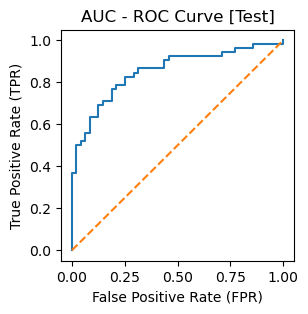

Accuracy Score (Test): 0.8517628205128205
Log_loss for Testing data : 0.4781264536777509


In [50]:
# to check AUC_ROC score & Curve
from sklearn.metrics import log_loss
plt.figure(figsize=(3,3))
plt.title('AUC - ROC Curve [Test]')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

fpr,tpr,thresh = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.show()


AUC_Score_test = roc_auc_score(y_test, y_test_prob)
print('Accuracy Score (Test):',AUC_Score_test)
Loss_test = log_loss(y_test,y_test_prob)
print('Log_loss for Testing data :',Loss_test)

In [51]:
from sklearn.metrics import log_loss

y_train_proba = best_model.predict_proba(X_train)
y_test_proba  = best_model.predict_proba(X_test)

print("Log Loss (Train):", log_loss(y_train, y_train_proba))
print("Log Loss (Test): ", log_loss(y_test, y_test_proba))


Log Loss (Train): 0.45309075386741166
Log Loss (Test):  0.4781264536777509


## Observations :

- Train accuracy ≈ 0.77 & Test accuracy  ≈ 0.77
- as per accuracy values model is Good
- No overfitting.
- achieves stable performance on unseen data.

#  Comparison and Analysis

### 1. Comparison of SVM with Different Kernels

#### Linear Kernel

- Works when data is almost linear
- Fast and simple
- Could not capture complex patterns in the dataset

##### Result:
- Moderate accuracy
- Suitable only for simple relationships

#### Polynomial Kernel
- Handles some non-linearity
- Performance depends on degree
- Higher degree increases overfitting

##### Result:
- Better than linear
- Slight overfitting observed

#### RBF Kernel
- Handles complex non-linear data
- Most flexible kernel
- Performs well after scaling and tuning

##### Result:
- Best and most stable accuracy
- Chosen as the final model

### 2. Strengths and Weaknesses of SVM (Based on EDA & Visuals)

#### Strengths
- Works well with multiple numerical features
- Handles non-linear relationships
- Gives good generalization (train ≈ test accuracy)
- Effective even with correlated features

#### Weaknesses
- Sensitive to feature scaling
- Needs careful hyperparameter tuning
- Hard to interpret compared to decision trees

##### SVM is powerful and accurate but requires proper scaling and tuning.

### 3. Practical Implications of SVM in Real-World Classification

### Where SVM is Useful
- Medical diagnosis
- Drug response prediction
- Disease classification
- Small to medium datasets

### Limitations in Real Use
- Training is slow for large datasets
- Not easily explainable to non-technical users
- Needs preprocessing before deployment

##### SVM is suitable for real-world medical classification tasks when accuracy is more important than interpretability.